In [44]:
import pandas as pd
import os

# Define the relative path to the data folder
db_path = os.path.join('..', 'data')

# Load df_final_dbscan
df_final_dbscan_path = os.path.join(db_path, 'df_final_dbscan.csv')
df_final_dbscan = pd.read_csv(df_final_dbscan_path)

# Load df_final_kmeans
df_final_kmeans_path = os.path.join(db_path, 'df_final_kmeans.csv')
df_final_kmeans = pd.read_csv(df_final_kmeans_path)

# Verify the loaded DataFrames
print("Loaded df_final_dbscan head:")
df_final_dbscan.head()

print("Loaded df_final_kmeans head:")
df_final_kmeans.head()


Loaded df_final_dbscan head:
Loaded df_final_kmeans head:


,customer_unique_id,index_order,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index_customer,...,RFMGroup_343,RFMGroup_344,RFMGroup_411,RFMGroup_412,RFMGroup_413,RFMGroup_414,RFMGroup_441,RFMGroup_442,RFMGroup_443,RFMGroup_444
0,7c396fd4830fd04220f754e42b4e5bff,0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,70296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,af07308b275d755c9edb36a90c618231,1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,77027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3a653a41f6f9fc3d2a113cf8398680e8,2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7c142cf63193a1473d2e66489a9ae977,3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,61081,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,72632f0f9dd73dfee390c9b22eb56dd6,4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,67263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### KMeans Clustering - Elbow Method (Data Driven)

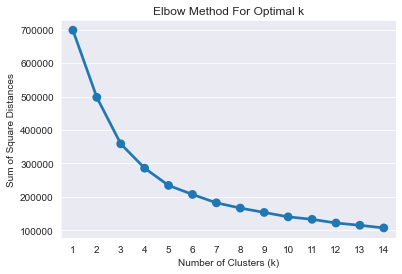

In [45]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for KMeans clustering
numeric_features = ['Recency', 'Frequency', 'Monetary', 'avg_review_score', 'review_count', 'RFMScore']

# Ensure only numeric features are used
df_final_kmeans_numeric = df_final_kmeans[numeric_features]

# Define the number of clusters
sum_of_squared_distances = []
for K in range(1, 15):
    km = KMeans(n_clusters=K, init='k-means++', max_iter=100, random_state=42)
    km = km.fit(df_final_kmeans_numeric)
    sum_of_squared_distances.append(km.inertia_)

# Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x=list(range(1, 15)), y=sum_of_squared_distances)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Observations from the Elbow Method Plot

1. **Elbow Point Identification**: The plot shows a clear "elbow" around \( k = 3 \) and \( k = 4 \), indicating these are likely optimal cluster numbers.
2. **Decreasing Inertia**: As the number of clusters increases from 1 to 14, the sum of squared distances (inertia) decreases, indicating better clustering performance with more clusters.
3. **Diminishing Returns**: Beyond \( k = 4 \), the rate of decrease in inertia slows down, suggesting that additional clusters beyond this point do not significantly improve the clustering quality.
4. **Optimal Cluster Range**: Considering the elbow point, choosing \( k = 3 \) or \( k = 4 \) would provide a good balance between clustering quality and simplicity.
5. **Data-driven Insight**: The elbow method effectively highlights the most appropriate cluster numbers based on the sum of squared distances, guiding the selection of \( k \).

In [46]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(df_final_kmeans_numeric)

#Find the clusters for the observation given in the dataset
df_final_kmeans['Cluster'] = KMean_clust.labels_
df_final_kmeans.head(10)

,customer_unique_id,index_order,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index_customer,...,RFMGroup_344,RFMGroup_411,RFMGroup_412,RFMGroup_413,RFMGroup_414,RFMGroup_441,RFMGroup_442,RFMGroup_443,RFMGroup_444,Cluster
0,7c396fd4830fd04220f754e42b4e5bff,0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,70296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,af07308b275d755c9edb36a90c618231,1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,77027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3a653a41f6f9fc3d2a113cf8398680e8,2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,7c142cf63193a1473d2e66489a9ae977,3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,61081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,72632f0f9dd73dfee390c9b22eb56dd6,4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,67263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,80bb27c7c16e8f973207a5086ab329e2,5,a4591c265e18cb1dcee52889e2d8acc3,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,68381,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
6,36edbb3fb164b1f16485364b6fb04c73,6,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-05-09 00:00:00,2017-05-09 00:00:00,2017-05-09,76073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7,932afa1e708222e5821dac9cd5db4cae,7,6514b8ad8028c9f2cc2374ded245783f,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,86945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
8,39382392765b6dc74812866ee5ee92a7,8,76c6e866289321a7c93b82b54852dc33,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,35466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
9,299905e3934e9e181bfb2e164dd4b4f8,9,e69bfb5eb88e0ed6a785585b27e16dbf,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,90725,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


<Figure size 720x576 with 0 Axes>

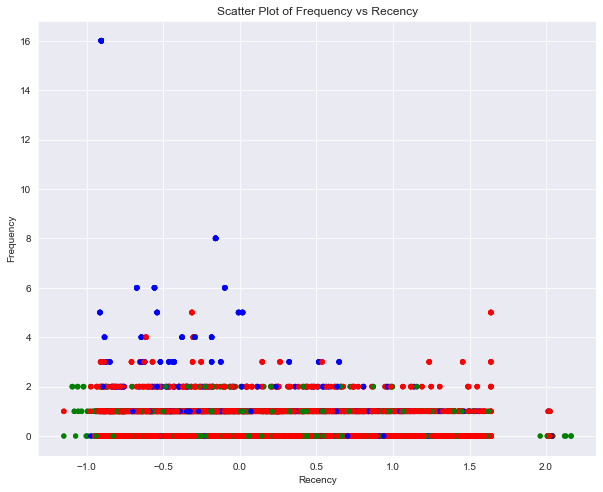

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming the 'Cluster' column is already created by KMeans clustering

plt.figure(figsize=(10, 8))

# Define colors for clusters
Colors = ["red", "green", "blue"]

# Map cluster labels to colors
df_final_kmeans['Color'] = df_final_kmeans['Cluster'].map(lambda p: Colors[p])

# Create scatter plot for Frequency vs Recency
ax = df_final_kmeans.plot(
    kind="scatter", 
    x="Recency", 
    y="Frequency",
    c=df_final_kmeans['Color'],
    figsize=(10, 8)
)

# Add titles and labels
plt.title('Scatter Plot of Frequency vs Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()


<Figure size 720x576 with 0 Axes>

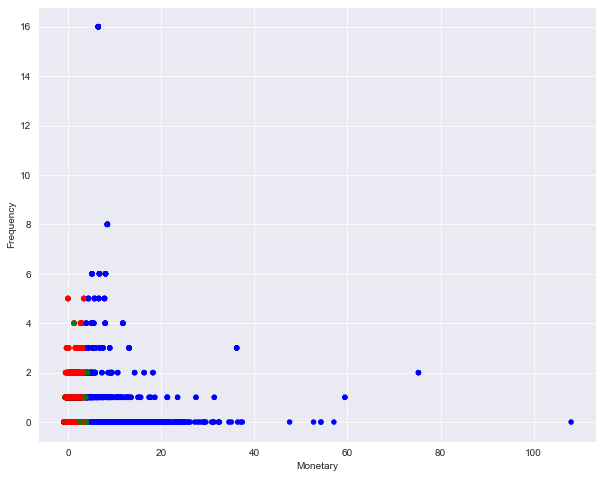

In [48]:
# Create scatter plot for Monetary vs Frequency
plt.figure(figsize=(10, 8))
ax = df_final_kmeans.plot(
    kind="scatter", 
    x="Monetary", 
    y="Frequency",
    c=df_final_kmeans['Color'],
    figsize=(10, 8)
)

<Figure size 720x576 with 0 Axes>

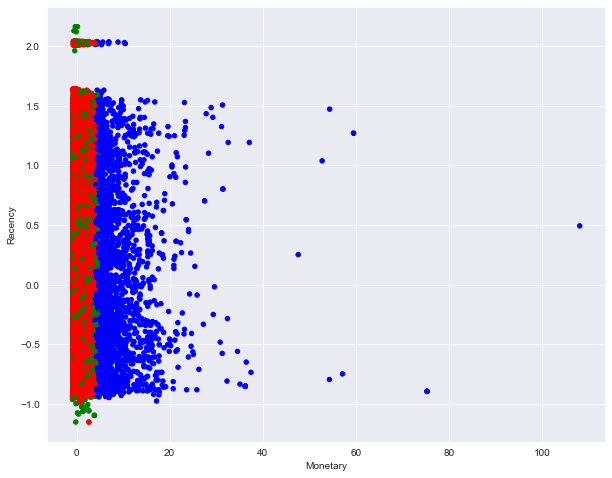

In [49]:
# Create scatter plot for Monetary vs Recency
plt.figure(figsize=(10, 8))
ax = df_final_kmeans.plot(
    kind="scatter", 
    x="Monetary", 
    y="Recency",
    c=df_final_kmeans['Color'],
    figsize=(10, 8)
)

<Figure size 720x576 with 0 Axes>

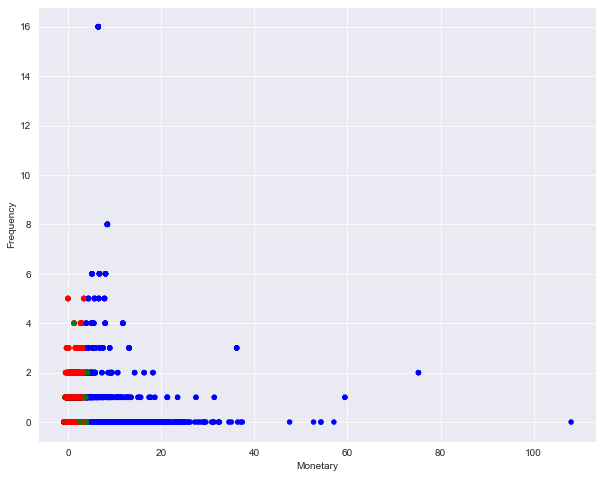

In [50]:
# Create scatter plot for Monetary vs Frequency
plt.figure(figsize=(10, 8))
ax = df_final_kmeans.plot(
    kind="scatter", 
    x="Monetary", 
    y="Frequency",
    c=df_final_kmeans['Color'],
    figsize=(10, 8)
)

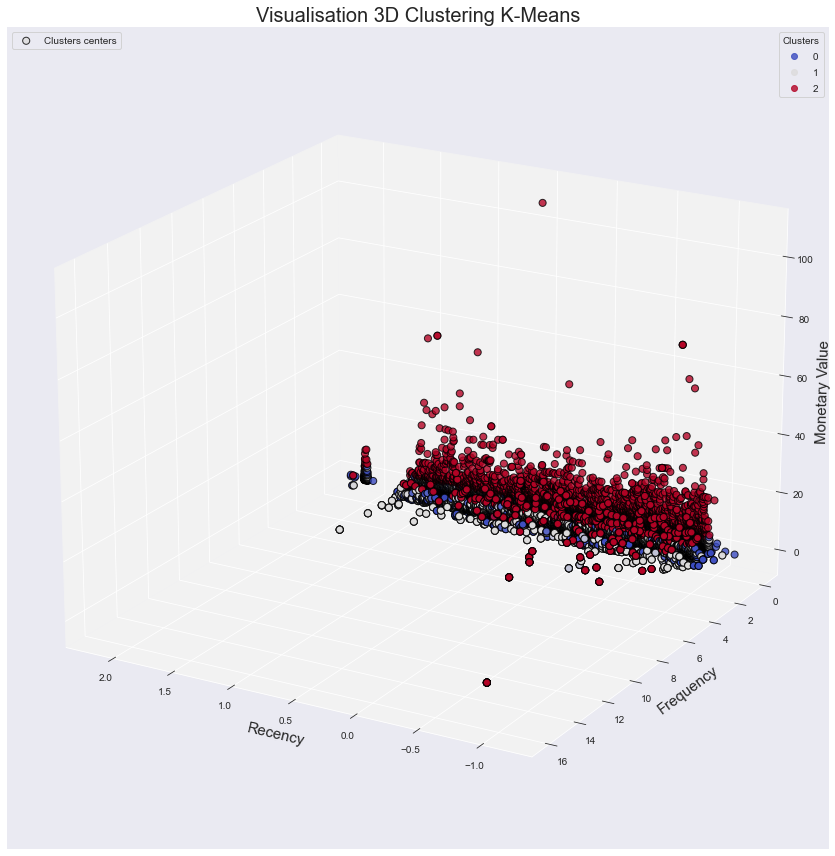

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# Sélectionner les caractéristiques pour le clustering
features = ['Recency', 'Frequency', 'Monetary', 'avg_review_score', 'review_count', 'RFMScore']

# Appliquer KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_final_kmeans[features])

# Récupérer les centres des clusters et les étiquettes
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualisation 3D
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Créer un graphique de dispersion 3D des points de données colorés par cluster
scatter = ax.scatter(df_final_kmeans['Recency'], df_final_kmeans['Frequency'], df_final_kmeans['Monetary'], c=labels, cmap='coolwarm', edgecolor='k', s=50, alpha=0.8)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker='X', color='red', s=200, edgecolor='k', label='Clusters centers')

# Étiquettes et titre
ax.set_xlabel('Recency', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_zlabel('Monetary Value', fontsize=15)
ax.set_title('Visualisation 3D Clustering K-Means', fontsize=20)

# Améliorations
ax.grid(True)
ax.xaxis.set_pane_color((0.95, 0.95, 0.95, 1.0))
ax.yaxis.set_pane_color((0.95, 0.95, 0.95, 1.0))
ax.zaxis.set_pane_color((0.95, 0.95, 0.95, 1.0))
ax.view_init(elev=20, azim=120)  # Ajuster pour le meilleur angle

# Légende
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
ax.legend(['Clusters centers'], loc='upper left')

plt.tight_layout()
plt.show()


### KMeans Clustering - Silhouette Score Method (Data Driven)   

- The Silhouette Score is a metric used to determine the optimal number of clusters in a dataset. It measures how similar an instance is to its own cluster compared to other clusters, calculated as:

- Silhouette Coefficient = (x - y)\max(x, y)

- where  y  is the mean intra-cluster distance and  x  is the mean nearest-cluster distance. The score ranges from -1 to 1, with values close to 1 indicating a well-clustered instance. Although computationally expensive, it provides clear and meaningful decisions on the optimal number of clusters.

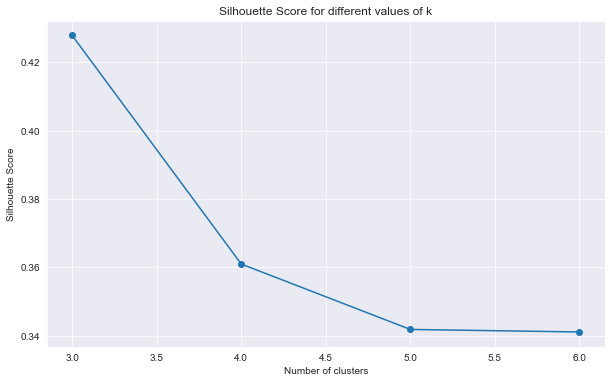

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Relative path to the data folder
db_path = os.path.join('..', 'data')

# Load df_final_kmeans
df_final_kmeans_path = os.path.join(db_path, 'df_final_kmeans.csv')
df_final_kmeans = pd.read_csv(df_final_kmeans_path)

# Select only numeric columns for KMeans clustering
numeric_features = ['Recency', 'Frequency', 'Monetary', 'avg_review_score', 'review_count', 'RFMScore']

# Ensure only numeric features are used
df_final_kmeans_numeric = df_final_kmeans[numeric_features]

# Calculate Silhouette Score
silhouette_scores = []
for K in range(3, 7):
    kmeans = KMeans(n_clusters=K, random_state=42)
    labels = kmeans.fit_predict(df_final_kmeans_numeric)
    silhouette_scores.append(silhouette_score(df_final_kmeans_numeric, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(3, 7), silhouette_scores, marker='o')
plt.title('Silhouette Score for different values of k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


### Observations:
- The Silhouette Score method indicates that the optimal number of clusters is 3 for the given dataset.
- The plot shows the silhouette scores for different numbers of clusters ranging from 3 to 6. The highest silhouette score is at k=3k=3 with a score of approximately 0.42. This suggests that 3 clusters provide the best separation and cohesion in the data.

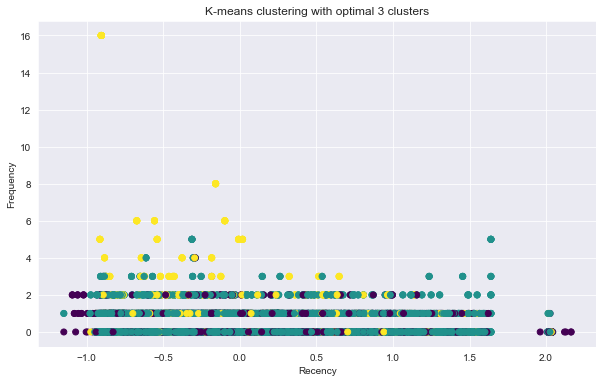

In [11]:
# Apply k-means with the optimal number of clusters (3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_final_kmeans_numeric)
df_final_kmeans['optimal_cluster'] = kmeans.labels_

# Visualize the optimal clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_final_kmeans_numeric['Recency'], df_final_kmeans_numeric['Frequency'], c=df_final_kmeans['optimal_cluster'], cmap='viridis')
plt.title(f'K-means clustering with optimal {optimal_k} clusters')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()


### Observations from the Clustering Result

1. **Three Distinct Clusters**: The plot shows three distinct clusters as indicated by the different colors.
2. **Cluster Distribution**: One cluster (yellow) has a wider spread across the Frequency axis, indicating more variation in customer frequency.
3. **Overlapping Clusters**: There is some overlap between clusters, especially along the Recency axis near zero, suggesting similarities between some data points.
4. **Low Recency Dominance**: Most data points are concentrated around lower Recency values, indicating that many customers have interacted with the business recently.
5. **Cluster Density**: The majority of the points in the lower Frequency and low to mid Recency range are densely packed, showing a high concentration of customers in this segment.

### DBSCAN Clustering (Data Driven)

            Recency     Frequency      Monetary  avg_review_score  \
count  99441.000000  99441.000000  99441.000000      99441.000000   
mean       0.371691      0.004951      0.012634          0.773462   
std        0.198498      0.024760      0.017755          0.335862   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.211140      0.000000      0.004691          0.750000   
50%        0.347150      0.000000      0.008155          1.000000   
75%        0.512953      0.000000      0.013873          1.000000   
max        1.000000      1.000000      1.000000          1.000000   

       review_count      RFMScore  
count  99441.000000  99441.000000  
mean       0.002770      0.640823  
std        0.037386      0.208723  
min        0.000000      0.000000  
25%        0.000000      0.555556  
50%        0.000000      0.666667  
75%        0.000000      0.777778  
max        1.000000      1.000000  


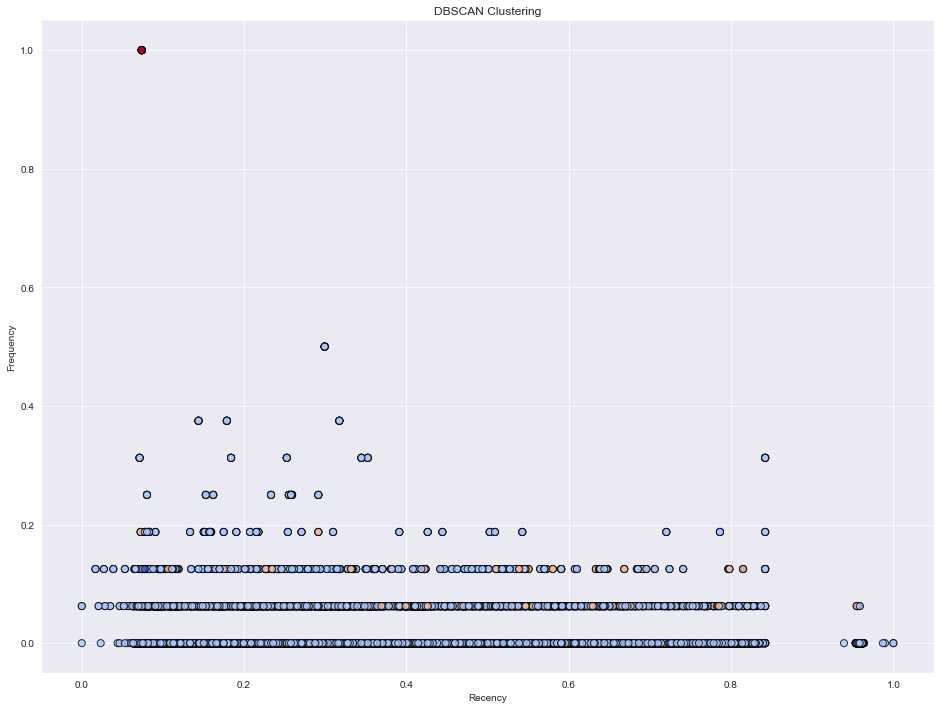

In [1]:
import os
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Relative path to the data folder
db_path = os.path.join('..', 'data')

# Load df_final_dbscan
df_final_dbscan_path = os.path.join(db_path, 'df_final_dbscan.csv')
df_final_dbscan = pd.read_csv(df_final_dbscan_path)

# Select only numeric columns for DBSCAN clustering
numeric_features = ['Recency', 'Frequency', 'Monetary', 'avg_review_score', 'review_count', 'RFMScore']

# Ensure only numeric features are used
df_final_dbscan_numeric = df_final_dbscan[numeric_features]

# Analyze the data to understand its scale
print(df_final_dbscan_numeric.describe())

# Perform DBSCAN clustering with optimized parameters
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Adjusted eps and min_samples for better performance
dbscan.fit(df_final_dbscan_numeric)

# Find the clusters for the observations given in the dataset
df_final_dbscan['Cluster'] = dbscan.labels_

# Display the first 10 rows of the dataframe to check the clustering result
df_final_dbscan.head(10)

# Plotting the clusters
plt.figure(figsize=(16, 12))  # Increased figure size for better visibility
plt.scatter(df_final_dbscan_numeric['Recency'], df_final_dbscan_numeric['Frequency'], c=df_final_dbscan['Cluster'], cmap='coolwarm', edgecolor='k', s=50, alpha=0.8)
plt.title('DBSCAN Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()


### Observations :

1. **Low Interaction Frequency**: Most users interact infrequently, as indicated by the mean Frequency of 0.004951 and the 75th percentile being 0.
2. **Recent User Activity**: Users' last interactions are somewhat recent, with a mean Recency of 0.371691 and significant variability (std 0.198498).
3. **Small Monetary Values**: Transactions or engagements are generally small in value, with a mean Monetary of 0.012634.
4. **Few Reviews with High Scores**: While review scores are high (mean 0.773462), very few users leave reviews (mean review_count of 0.002770).
5. **Dense Core with Outliers**: DBSCAN clustering shows a dense core cluster with some outliers, indicating common patterns among the majority and significant deviations for a few.
6. **Parameter Sensitivity**: Few clusters were identified, showing DBSCAN's sensitivity to `eps=0.3` and `min_samples=10`.
7. **Frequent, Recent Interactions**: The core cluster suggests frequent but recent user interactions.


### Business-Oriented Clustering Approach
- A business-oriented clustering approach involves incorporating domain-specific knowledge and business objectives into the clustering process. This method goes beyond purely data-driven techniques to ensure the clusters are meaningful and actionable from a business perspective. Here’s how we can proceed:

1. **Create a Composite RFM Score**: Combines Recency, Frequency, and Monetary values into a single metric.
   - **Justification**: Simplifies analysis by summarizing key aspects of customer behavior.

2. **Weight RFM Components**: Uses weights (0.15 Recency, 0.28 Frequency, 0.57 Monetary) based on business insights.
   - **Justification**: Emphasizes the most critical factor, Monetary value, in determining customer value.

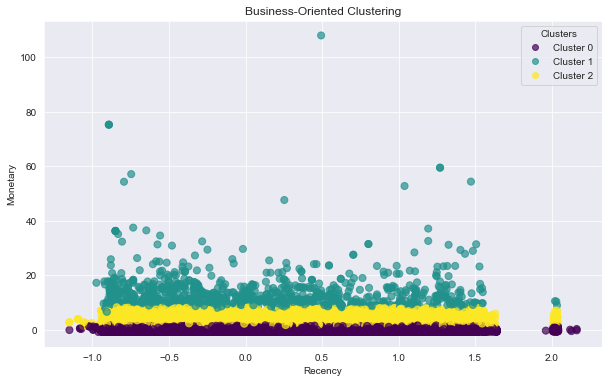

         NumCustomers  TotalRevenue  Frequency   Recency
Cluster                                                 
0               87994   1790.037940   0.047594  0.080624
1                1060  13910.532680   0.645283  0.052980
2               10387  32812.124582   0.289400  0.090025


In [4]:
import os
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Relative path to the data folder
db_path = os.path.join('..', 'data')

# Load df_final_kmeans
df_final_kmeans_path = os.path.join(db_path, 'df_final_kmeans.csv')
df_final_kmeans = pd.read_csv(df_final_kmeans_path)

# Ensure the necessary columns exist
required_columns = ['Recency', 'Frequency', 'Monetary', 'customer_unique_id']
missing_columns = [col for col in required_columns if col not in df_final_kmeans.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the dataset: {missing_columns}")

# Define RFM features based on business logic
df_final_kmeans['RFMScore'] = df_final_kmeans['Recency'] * 0.15 + df_final_kmeans['Frequency'] * 0.28 + df_final_kmeans['Monetary'] * 0.57

# Select relevant features for clustering
features = ['Recency', 'Frequency', 'Monetary', 'RFMScore']
X = df_final_kmeans[features]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_final_kmeans['Cluster'] = kmeans.fit_predict(X)

# Save the DataFrame with the 'Cluster' column to a new CSV file
output_path = os.path.join(db_path, 'df_final_kmeans_with_clusters.csv')
df_final_kmeans.to_csv(output_path, index=False)

# Analyze and visualize clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_final_kmeans['Recency'], df_final_kmeans['Monetary'], c=df_final_kmeans['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('Business-Oriented Clustering')
plt.xlabel('Recency')
plt.ylabel('Monetary')
# Create a legend
handles, labels = scatter.legend_elements()
legend_labels = [f'Cluster {i}' for i in range(len(handles))]
plt.legend(handles, legend_labels, title="Clusters")
plt.show()

# Validate clusters with business metrics
cluster_summary = df_final_kmeans.groupby('Cluster').agg({
    'customer_unique_id': 'count',
    'Monetary': 'sum',
    'Frequency': 'mean',
    'Recency': 'mean'
}).rename(columns={'customer_unique_id': 'NumCustomers', 'Monetary': 'TotalRevenue'})
print(cluster_summary)


### Observations from Clustering Results

1. **Cluster Distribution**:
   - **Cluster 0**: Largest group with 87,994 customers, but contributes the least to revenue.
   - **Cluster 1**: Smallest group with 1,060 customers, but has the highest frequency of interactions.
   - **Cluster 2**: Moderate size with 10,387 customers, generating the highest total revenue.

2. **Customer Behavior**:
   - **Cluster 0**: Low engagement and recent activity; likely low-value customers.
   - **Cluster 1**: High engagement and recent activity; potential loyal customers.
   - **Cluster 2**: Moderate engagement, contributing significantly to revenue; important for business.

3. **Revenue Insight**:
   - Focus on **Cluster 2** for revenue growth and **Cluster 1** for maintaining loyalty.


### Conclusion
- In this notebook, we explored two clustering methods, KMeans and DBSCAN, to segment customers based on their behavior and interactions with an e-commerce platform. We applied both data-driven and business-oriented approaches to identify meaningful customer segments and provide actionable insights for business strategies.
- The clustering results revealed distinct customer groups with varying levels of engagement, recency, and monetary value. By analyzing these clusters, businesses can tailor marketing campaigns, retention strategies, and customer service efforts to meet the specific needs of each segment.
- The combination of data-driven clustering techniques and domain-specific knowledge enables businesses to derive valuable insights from customer data, optimize marketing efforts, and enhance customer relationships.
- Domain-specific clustering approaches, such as the RFM-based clustering with weighted scores, provide a more nuanced understanding of customer behavior and preferences, leading to more effective business decisions and improved revenue generation.